In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
netflix_overall = pd.read_csv('netflix_titles.csv')

In [3]:
netflix_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
netflix_overall.shape

(7787, 12)

In [5]:
netflix_overall[netflix_overall['title'] == 'Dinner for Five']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1765,s1766,TV Show,Dinner for Five,NaN,NaN,United States,"February 4, 2008",2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo..."


In [6]:
netflix_overall.loc[netflix_overall['title'] == 'Dinner for Five']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1765,s1766,TV Show,Dinner for Five,NaN,NaN,United States,"February 4, 2008",2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo..."


In [7]:
netflix_overall.iloc[:1765, 2:6]

,title,director,cast,country
0,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil
1,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico
2,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore
3,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States
4,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States
...,...,...,...,...
1760,Dil Se,Mani Ratnam,"Shah Rukh Khan, Manisha Koirala, Preity Zinta,...",India
1761,Dil Vil Pyaar Vyaar,Manjeet Maan,"Gurdas Maan, Neeru Bajwa, Jassi Gill, Rajiv Th...",India
1762,Dilan 1990,"Fajar Bustomi, Pidi Baiq","Vanesha Prescilla, Iqbaal Ramadhan, Debo Andry...",Indonesia
1763,Dilan 1991,"Fajar Bustomi, Pidi Baiq","Iqbaal Ramadhan, Vanesha Prescilla, Ira Wibowo...",Indonesia


In [8]:
netflix_overall['type'].nunique()

2

In [9]:
netflix_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [10]:
netflix_overall['director'].isna().sum()

2389

In [11]:
null_value_count = netflix_overall.isnull().sum()
null_value_count

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [12]:
netflix_shows = netflix_overall[netflix_overall['type']=='TV Show']

In [13]:
netflix_movies = netflix_overall[netflix_overall['type']=='Movie']

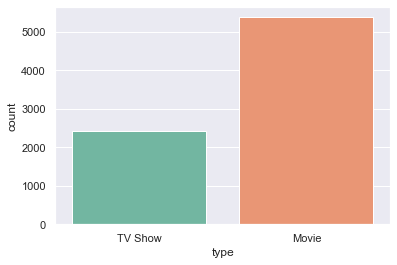

In [14]:
sns.set(style='darkgrid')
ax = sns.countplot(x='type', data=netflix_overall, palette='Set2')

#### If a producer wants to release some content, which month must he do so ? (Month when least amount of content is added)

In [15]:
netflix_date_temp1 = netflix_shows['date_added'].dropna()
netflix_date_temp1.head()

0       August 14, 2020
5          July 1, 2017
11    November 30, 2018
12         May 17, 2019
16       March 20, 2019
Name: date_added, dtype: object

In [16]:
netflix_date_temp2 = netflix_shows[['date_added']].dropna()
netflix_date_temp2.head()

,date_added
0,"August 14, 2020"
5,"July 1, 2017"
11,"November 30, 2018"
12,"May 17, 2019"
16,"March 20, 2019"


In [17]:
print(type(netflix_date_temp1))
print(type(netflix_date_temp2))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [18]:
netflix_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law..."
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


In [19]:
len(netflix_shows.loc[netflix_shows['release_year'] == 2013])

65

In [20]:
netflix_shows.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [21]:
print('May 17, 2019'.lstrip().split(' '))

['May', '17,', '2019']


In [22]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['Year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['Month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])	

In [23]:
netflix_date.head() 

,date_added,Year,Month
0,"August 14, 2020",2020,August
5,"July 1, 2017",2017,July
11,"November 30, 2018",2018,November
12,"May 17, 2019",2019,May
16,"March 20, 2019",2019,March


In [24]:
netflix_date.sort_values(by=['Year'])

,date_added,Year,Month
1765,"February 4, 2008",2008,February
2503,"October 8, 2013",2013,October
6056,"September 1, 2013",2013,September
1089,"August 2, 2013",2013,August
3098,"March 31, 2013",2013,March
...,...,...,...
6203,"January 1, 2021",2021,January
3472,"January 15, 2021",2021,January
3441,"January 4, 2021",2021,January
4468,"January 13, 2021",2021,January


In [25]:
netflix_date.dtypes

date_added    object
Year          object
Month         object
dtype: object

In [26]:
len(netflix_date.loc[(netflix_date['Year'] == '2016') & (netflix_date['Month'] == 'December')])

44

In [27]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
month_order

['December',
 'November',
 'October',
 'September',
 'August',
 'July',
 'June',
 'May',
 'April',
 'March',
 'February',
 'January']

In [28]:
netflix_date

,date_added,Year,Month
0,"August 14, 2020",2020,August
5,"July 1, 2017",2017,July
11,"November 30, 2018",2018,November
12,"May 17, 2019",2019,May
16,"March 20, 2019",2019,March
...,...,...,...
7767,"December 15, 2016",2016,December
7775,"August 14, 2020",2020,August
7777,"July 1, 2019",2019,July
7779,"November 26, 2019",2019,November


In [29]:
netflix_date.loc[netflix_date['Year'] == '2016'].shape

(185, 3)

In [30]:
netflix_overall['type'].nunique()

2

In [31]:
netflix_overall.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [32]:
df = netflix_date.groupby('Year')['Month'].value_counts().unstack().fillna(0)[month_order].T
df.head(12)

Year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
Month,,,,,,,,,,
December,0.0,0.0,1.0,7.0,44.0,39.0,64.0,50.0,74.0,0.0
November,0.0,0.0,3.0,2.0,18.0,31.0,41.0,77.0,55.0,0.0
October,0.0,2.0,0.0,5.0,18.0,32.0,46.0,73.0,56.0,0.0
September,0.0,1.0,0.0,1.0,19.0,33.0,44.0,44.0,62.0,0.0
August,0.0,1.0,0.0,0.0,17.0,38.0,34.0,53.0,61.0,0.0
July,0.0,0.0,0.0,3.0,10.0,34.0,30.0,67.0,53.0,0.0
June,0.0,0.0,0.0,3.0,8.0,30.0,28.0,48.0,48.0,0.0
May,0.0,0.0,0.0,2.0,4.0,25.0,28.0,49.0,64.0,0.0
April,0.0,0.0,1.0,4.0,8.0,29.0,31.0,50.0,58.0,0.0


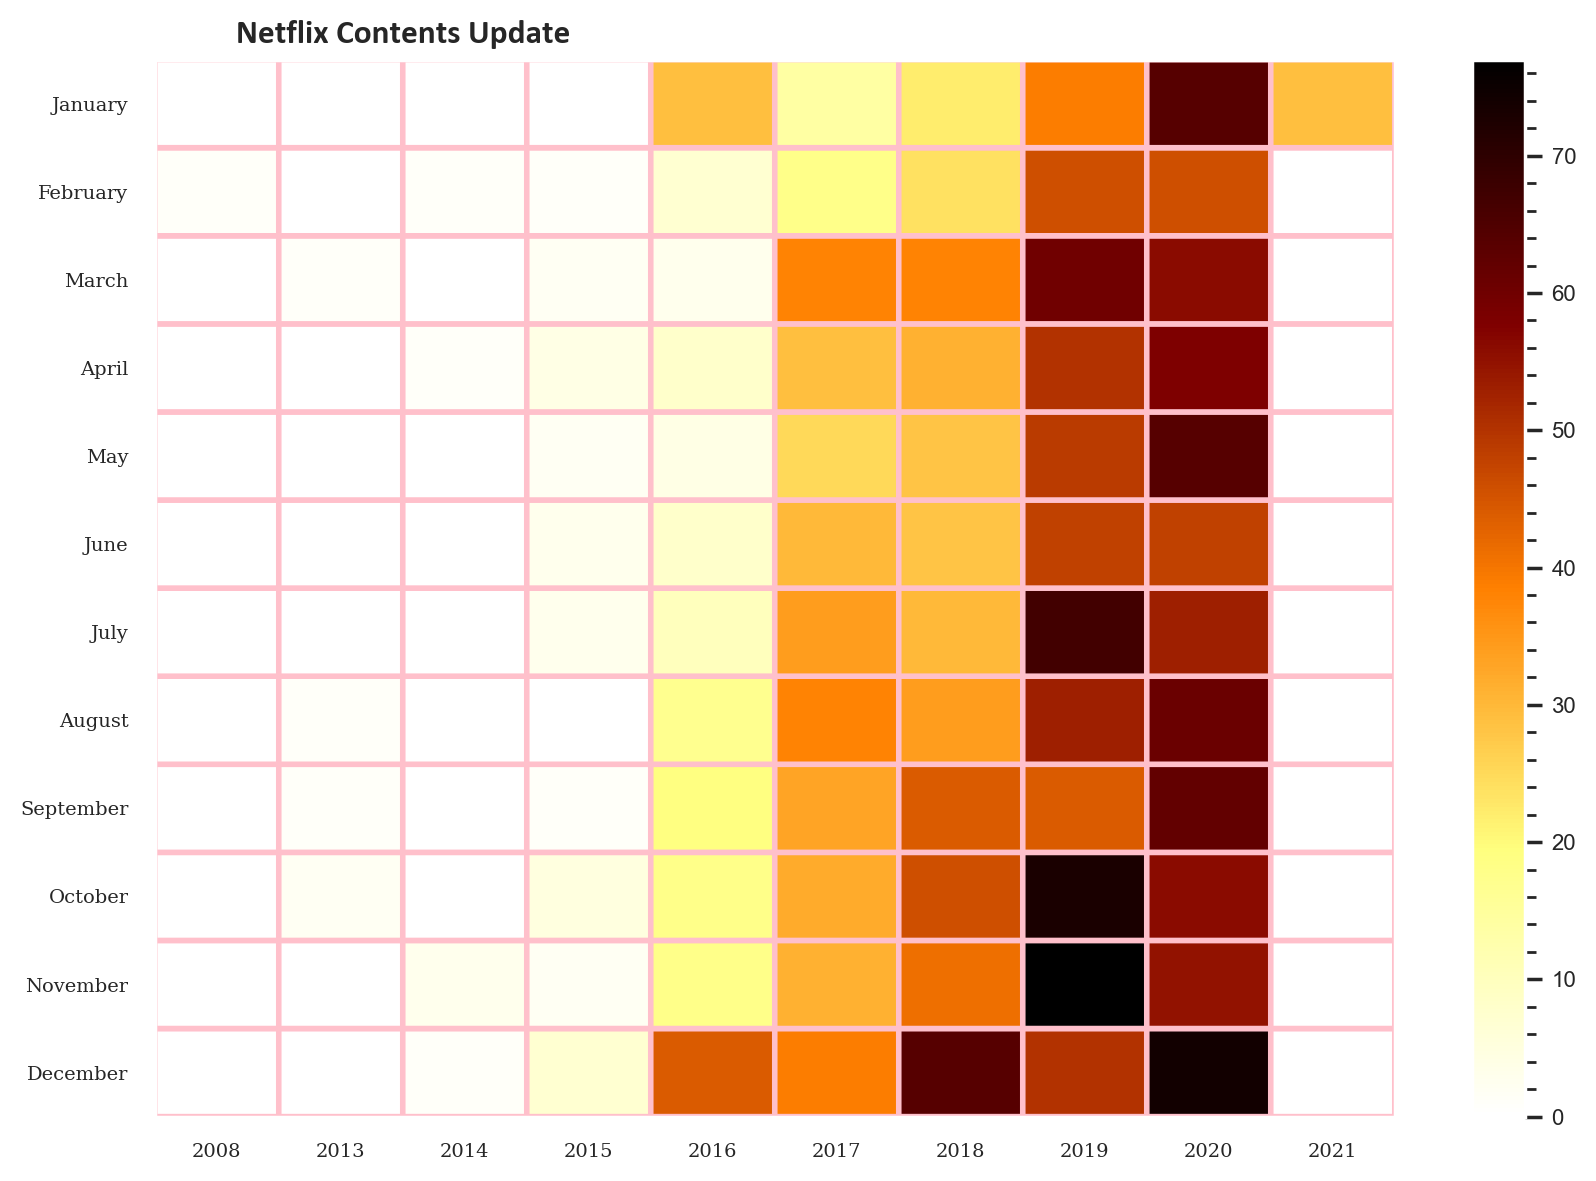

In [33]:
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='pink', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

### January, February, June are the months when comparatively much less content is released. Therefore, these months may be a good choice for the success of a new release!

## Movie Ratings Analysis

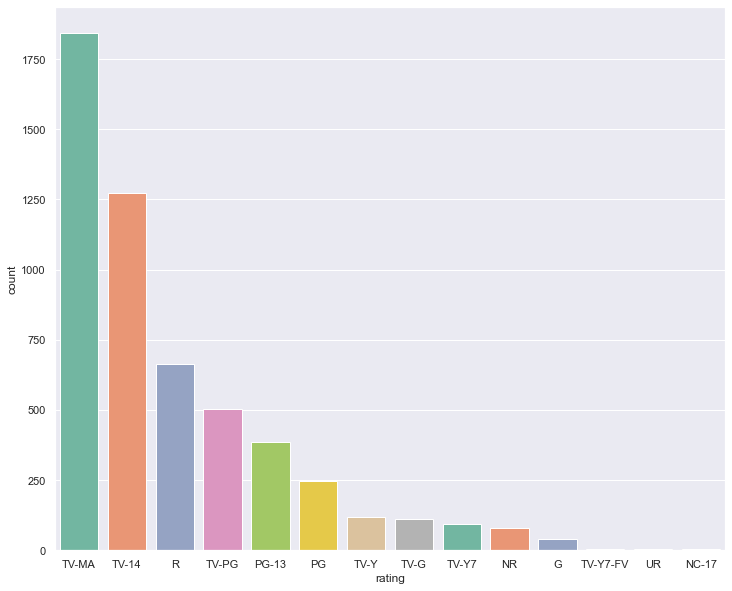

In [34]:
plt.figure(figsize=(12, 10))
sns.set(style='darkgrid')
ax = sns.countplot(data=netflix_movies, x='rating', palette='Set2', order=netflix_movies['rating'].value_counts().index[0:15])

### Analysing IMDB ratings to get top rated movies on Netflix

In [35]:
imdb_ratings = pd.read_csv('IMDB_ratings.csv', usecols=['weighted_average_vote'])
imdb_titles = pd.read_csv('IMDB_movies.csv', usecols=['title', 'year', 'genre'], low_memory=False) #low_memory=False because of some warning

In [36]:
ratings = pd.DataFrame({'Title': imdb_titles.title,
                        'Release Year': imdb_titles.year,         
                        'Rating': imdb_ratings.weighted_average_vote,         
                        'Genre': imdb_titles.genre})
ratings.drop_duplicates(subset=['Title', 'Release Year', 'Rating'], inplace=True)

In [37]:
ratings.shape

(85852, 4)

### Performing inner join on the ratings dataset and netflix dataset to get the content that has both ratings on IMDB and are available on Netflix.


In [38]:
ratings.dropna()
joint_data = ratings.merge(netflix_overall, left_on='Title', right_on='title', how='inner')
joint_data = joint_data.sort_values(by='Rating', ascending=False)

In [39]:
joint_data.isna().sum()

Title             0
Release Year      0
Rating            0
Genre             0
show_id           0
type              0
title             0
director        328
cast             61
country          46
date_added        2
release_year      0
rating            1
duration          0
listed_in         0
description       0
dtype: int64

In [40]:
# joint_data.dropna(inplace=True)

In [41]:
joint_data.drop(['title'], axis=1, inplace=True)
joint_data.head(5)

,Title,Release Year,Rating,Genre,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
991,Innocent,2017,9.0,Comedy,s3009,TV Show,Seren Yüce,"Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...",Turkey,"January 23, 2019",2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In a peaceful, rustic town, a retired officer ..."
1002,Breakout,2019,9.0,"Adventure, Comedy, Drama",s1093,TV Show,NaN,"Jeanette Aw, Elvin Ng, Zhou Ying, Christopher ...",NaN,"July 1, 2017",2010,TV-14,1 Season,"International TV Shows, TV Dramas",After losing her family in a suspicious car cr...
398,Pulp Fiction,1994,8.9,"Crime, Drama",s5003,Movie,Quentin Tarantino,"John Travolta, Samuel L. Jackson, Uma Thurman,...",United States,"January 1, 2019",1994,R,154 min,"Classic Movies, Cult Movies, Dramas",This stylized crime caper weaves together stor...
380,Schindler's List,1993,8.9,"Biography, Drama, History",s5431,Movie,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,"April 1, 2018",1993,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...
1301,Inception,2010,8.8,"Action, Adventure, Sci-Fi",s2980,Movie,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...","United States, United Kingdom","January 1, 2020",2010,PG-13,148 min,"Action & Adventure, Sci-Fi & Fantasy, Thrillers","In this mind-bending sci-fi thriller, a man ru..."


### Netflix Top 10

In [42]:
import plotly.express as px

In [43]:
top_rated = joint_data[0:10]
fig = px.sunburst(
    top_rated, 
    path = ['Title', 'country'],
    values = 'Rating',
    color = 'Rating')
fig.show()

### Countries with highest content.

In [44]:
# joint_data[joint_data['country'] == 'United States'].value_counts()
len(joint_data['country'] == 'India')

2739

In [45]:
joint_data['country'].value_counts().sort_values(ascending=False)

United States                    799
India                            701
United Kingdom                   107
Canada                            56
Philippines                       50
                                ... 
Canada, United States, France      1
United States, Norway, Canada      1
India, Pakistan                    1
India, Australia                   1
United Arab Emirates               1
Name: country, Length: 299, dtype: int64

In [46]:
joint_data.head(1)

,Title,Release Year,Rating,Genre,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
991,Innocent,2017,9.0,Comedy,s3009,TV Show,Seren Yüce,"Ali Atay, Haluk Bilginer, Nur Sürer, Okan Yala...",Turkey,"January 23, 2019",2017,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In a peaceful, rustic town, a retired officer ..."


In [47]:
joint_data['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [48]:
joint_data.groupby('rating')['type'].value_counts()

rating  type   
G       Movie        8
NC-17   Movie        2
NR      Movie       30
PG      Movie       81
PG-13   Movie      197
R       Movie      412
TV-14   Movie      644
        TV Show    109
TV-G    Movie       11
        TV Show      1
TV-MA   Movie      829
        TV Show    196
TV-PG   Movie      157
        TV Show     21
TV-Y    TV Show      5
        Movie        4
TV-Y7   Movie       17
        TV Show     12
UR      Movie        2
Name: type, dtype: int64

In [49]:
joint_data.loc[(joint_data['rating'] == 'PG') & (joint_data['type'] == 'TV Show')].shape[0]

0

In [50]:
joint_data.loc[(joint_data['rating'] == 'PG') & (joint_data['type'] == 'Movie')].shape[0]

81

In [51]:
country_count = joint_data['country'].value_counts().sort_values(ascending=False)
country_count = pd.DataFrame(country_count)
top_countries = country_count[0:11]
top_countries

,country
United States,799
India,701
United Kingdom,107
Canada,56
Philippines,50
Spain,40
South Korea,36
Indonesia,35
France,33
"United Kingdom, United States",31


In [52]:
value_count = list(joint_data['country'].value_counts())[0:10]

In [53]:
value_count

[799, 701, 107, 56, 50, 40, 36, 35, 33, 31]

In [54]:
# Find a way to dynamically input country values
data = dict(
    # number=[705, 688, 58, 50, 45, 35, 34, 26, 21, 20],
    number=list(joint_data['country'].value_counts())[0:10],
    country=['United States', 'India', 'United Kingdom',  'Canada', 'Philippines', 'Spain', 'South Korea', 'Indonesia', 'France', 'UK/US'])
fig = px.funnel(data, x='number', y='country')
fig.show()

## Year wise analysis

In [55]:
netflix_movies['release_year'].value_counts()

2017    744
2018    734
2016    642
2019    582
2020    411
       ... 
1946      1
1963      1
1964      1
1947      1
1959      1
Name: release_year, Length: 72, dtype: int64

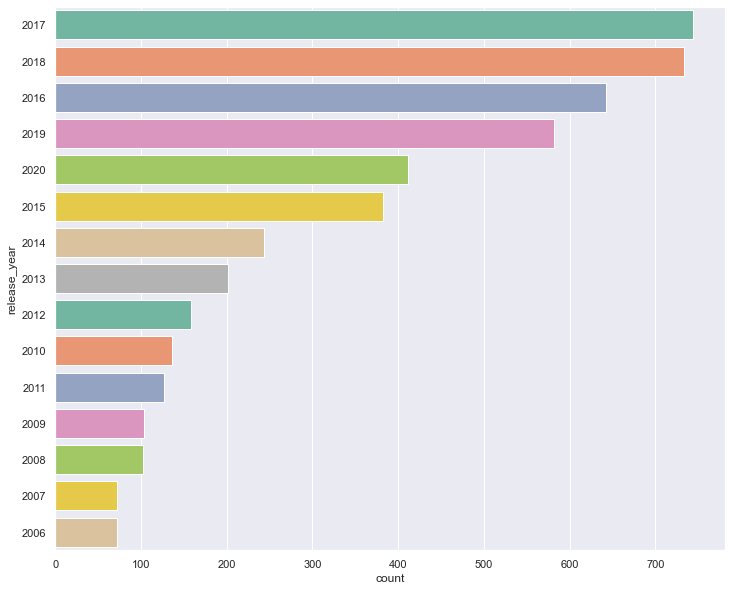

In [56]:
plt.figure(figsize=(12, 10))
sns.set(style='darkgrid')
ax = sns.countplot(data=netflix_movies, y='release_year', palette='Set2', order=netflix_movies['release_year'].value_counts().index[0:15])

In [57]:
cou = list(netflix_movies['country'])
cou[0:5]

['Mexico', 'Singapore', 'United States', 'United States', 'Egypt']

In [58]:
temp = {1: ['a', 'l'], 2: 'b', 3: 3}
# list(temp.keys())[0]
# len(temp)
if 3 in list(temp.keys()):
    temp[3] += 1
temp
# temp[1][0]

{1: ['a', 'l'], 2: 'b', 3: 4}

In [59]:
netflix_movies['country'].isnull().sum()

230

In [60]:
netflix_movies['country'].fillna('Unknown', inplace=True) # Solve SettingWithCopyWarning 

c:\Users\shaur\anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
# netflix_movies.loc[netflix_movies['country'].isnull()]

In [62]:
# netflix_movies.loc[netflix_movies['country'].isnull()]['country'] = 'Unknown'

In [63]:
netflix_movies.loc[netflix_movies['country'] == 'Unknown'].head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",Unknown,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
97,s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",Unknown,"December 31, 2019",2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...


In [64]:
countries = {}

cou = list(netflix_movies['country'])
for i in cou:
    # print(i)
    x = list(i.split(','))
    # print('x', x)
    if len(x) == 1:
        if i in list(countries.keys()):
            countries[i] += 1
            # print('coun:', countries[i])
        else:
            countries[i[0]] = 1 # Initial value for a country
            # print('try', i)
            # print(countries)
            # print(countries[i[0]])
    else:
        for j in x:
            # print('j', j)    
            if j in list(countries.keys()):
                countries[j] += 1
            else:
                countries[j] = 1

In [65]:
list(countries.keys())[15:18]

['United States', ' South Africa', 'Portugal']

In [66]:
list(countries.items())[15:18]

[('United States', 2089), (' South Africa', 14), ('Portugal', 2)]

In [67]:
countries_fin = {}
for country, no in countries.items():
    country = country.replace(' ', '')
    if country in list(countries_fin.keys()):
        countries_fin[country] += no
    else:
        countries_fin[country] = no
        
countries_fin = {k: v for k, v in sorted(countries_fin.items(), key = lambda item: item[1], reverse = True)} # ??

In [68]:
countries_fin

{'UnitedStates': 2420,
 'India': 854,
 'UnitedKingdom': 464,
 'Canada': 281,
 'France': 263,
 'Spain': 150,
 'Germany': 146,
 'China': 102,
 'Mexico': 100,
 'Japan': 99,
 'HongKong': 97,
 'Egypt': 93,
 'Australia': 83,
 'Turkey': 76,
 'Belgium': 74,
 'Indonesia': 71,
 'Philippines': 68,
 'Italy': 64,
 'Argentina': 62,
 'Brazil': 54,
 'SouthKorea': 51,
 'SouthAfrica': 44,
 'Nigeria': 44,
 'Netherlands': 37,
 'Thailand': 36,
 'UnitedArabEmirates': 33,
 'Denmark': 31,
 'Sweden': 29,
 'Ireland': 28,
 'Poland': 24,
 'Norway': 20,
 'NewZealand': 20,
 'Chile': 19,
 'Israel': 18,
 'Singapore': 17,
 'Switzerland': 16,
 'Pakistan': 15,
 'Lebanon': 15,
 'CzechRepublic': 14,
 'Uruguay': 13,
 'Taiwan': 13,
 'Colombia': 12,
 'Luxembourg': 10,
 'Russia': 10,
 'Bulgaria': 9,
 'Romania': 9,
 'Austria': 8,
 'Greece': 8,
 'Serbia': 7,
 'Jordan': 7,
 'Finland': 7,
 'Qatar': 7,
 'Peru': 7,
 'Iceland': 6,
 'Morocco': 6,
 'Cambodia': 5,
 'Portugal': 4,
 'Iran': 4,
 '': 4,
 'Hungary': 4,
 'SovietUnion': 3,
 '

## Top Ten Content Creating Countries

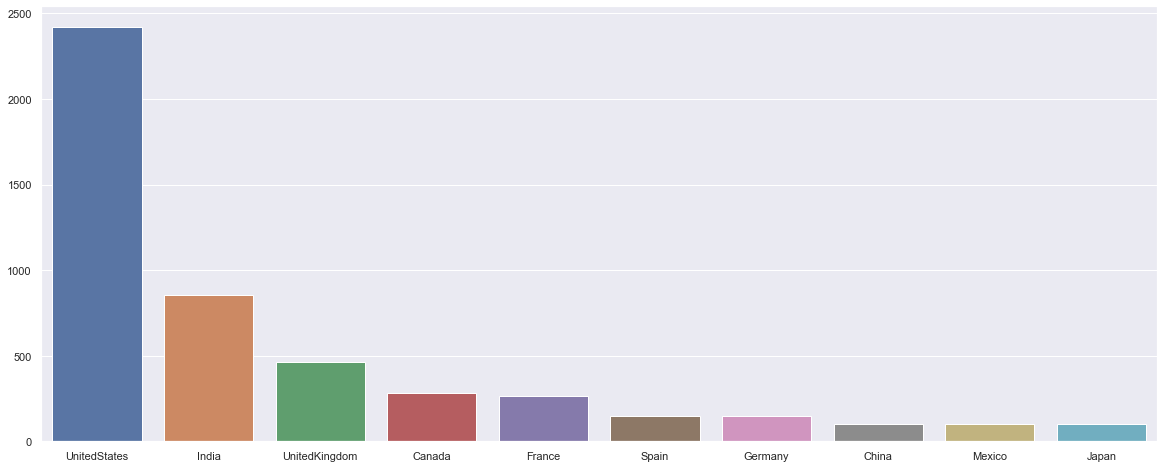

In [69]:
plt.figure(figsize = (20,8))
ax = sns.barplot(x = list(countries_fin.keys())[0:10], y = list(countries_fin.values())[0:10])
# ax.set_xticklabels(list(countries_fin.keys())[0:10])

## Analysis of duration of movies.

In [70]:
# type(netflix_movies['duration'])

In [71]:
netflix_movies['duration']

1        93 min
2        78 min
3        80 min
4       123 min
6        95 min
         ...   
7781     88 min
7782     99 min
7783    111 min
7784     44 min
7786     90 min
Name: duration, Length: 5377, dtype: object

In [72]:
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '')
netflix_movies['duration'] = netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration'] # Solve SettingWithCopyWarning issue

C:\Users\shaur\AppData\Local\Temp/ipykernel_2204/2107135514.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shaur\AppData\Local\Temp/ipykernel_2204/2107135514.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1        93
2        78
3        80
4       123
6        95
       ... 
7781     88
7782     99
7783    111
7784     44
7786     90
Name: duration, Length: 5377, dtype: int32

<AxesSubplot:xlabel='duration', ylabel='Density'>

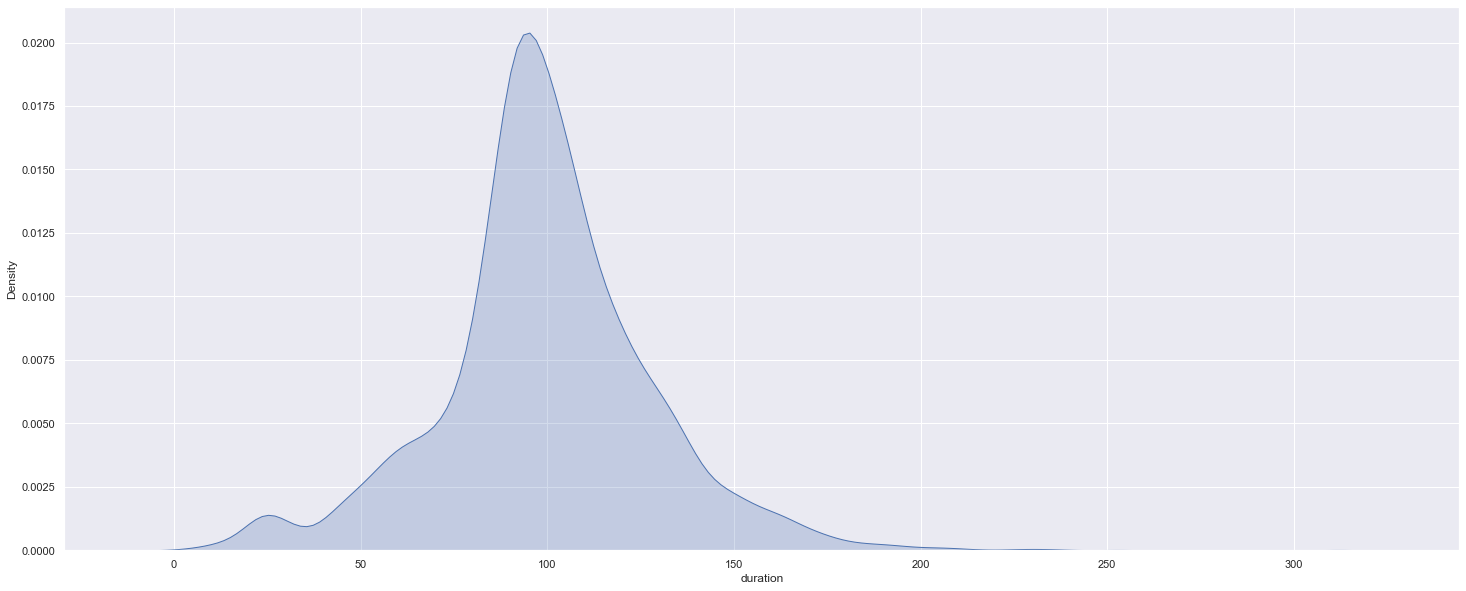

In [73]:
plt.figure(figsize=(25, 10))
sns.set(style='darkgrid')
sns.kdeplot(data = netflix_movies['duration'], shade = True)

In [74]:
netflix_movies.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [75]:
countries = list(netflix_movies['country'])

In [76]:
from collections import Counter

genres = list(netflix_movies['listed_in'])
gen = []

# print(genres[0])

for i in genres:
    i = list(i.split(','))
    for j in i:
        # print(j)
        gen.append(j.replace(' ', ''))
print(gen[0:10])        
genre_count = Counter(gen)

['Dramas', 'InternationalMovies', 'HorrorMovies', 'InternationalMovies', 'Action&Adventure', 'IndependentMovies', 'Sci-Fi&Fantasy', 'Dramas', 'HorrorMovies', 'InternationalMovies']


In [77]:
genre_count

Counter({'Dramas': 2106,
         'InternationalMovies': 2437,
         'HorrorMovies': 312,
         'Action&Adventure': 721,
         'IndependentMovies': 673,
         'Sci-Fi&Fantasy': 218,
         'Thrillers': 491,
         'Documentaries': 786,
         'SportsMovies': 196,
         'Comedies': 1471,
         'RomanticMovies': 531,
         'Movies': 56,
         'Music&Musicals': 321,
         'LGBTQMovies': 90,
         'Faith&Spirituality': 57,
         'Children&FamilyMovies': 532,
         'ClassicMovies': 103,
         'CultMovies': 59,
         'Stand-UpComedy': 329,
         'AnimeFeatures': 57})

In [78]:
a = pd.Series(['Dramas, International Movies'])
print(a)

0    Dramas, International Movies
dtype: object


In [79]:
a.apply(lambda x : x.split(', ')[-1])

0    International Movies
dtype: object

### Lollipop plot of Genres vs their count on Netflix.

C:\Users\shaur\AppData\Local\Temp/ipykernel_2204/788664083.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



Text(0.5, 1.0, 'Genres')

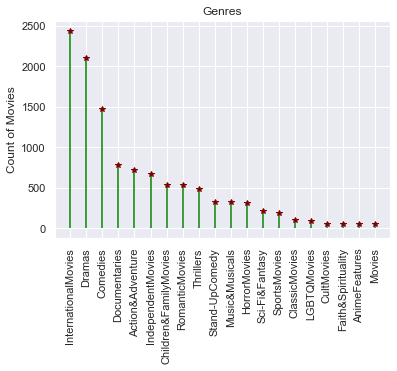

<Figure size 1440x720 with 0 Axes>

In [80]:
g = {k: v for k, v in sorted(genre_count.items(), key = lambda item: item[1], reverse = True)}

fig, ax = plt.subplots()
fig = plt.figure(figsize = (20, 10))
x = list(g.keys())
y = list(g.values())
ax.vlines(x, ymin = 0, ymax = y, color = 'green')
ax.plot(x, y, '*', color = 'maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel('Count of Movies')
# Set a Title
ax.set_title('Genres')

### Analysis of TV series on Netflix

In [81]:
countries1 = {}
netflix_shows['country'] = netflix_shows['country'].fillna('Unknown')
cou1 = list(netflix_shows['country'])

for i in cou1:
    # print(i)
    i = list(i.split(','))
    if len(i) == 1:
        if i in list(countries1.keys()):
            countries1[i] += 1
        else:
            countries1[i[0]] = 1
            # print(countries1)
    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j] += 1
            else:
                countries1[j] = 1

C:\Users\shaur\AppData\Local\Temp/ipykernel_2204/3100577453.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
countries_fin1 = {}
for country, no in countries1.items():
    country = country.replace(' ', '')
    if country in list(countries_fin1.keys()):
        countries_fin1[country] += no
    else: 
        countries_fin1[country] = no

countries_fin1 = {k: v for k, v in sorted(countries_fin1.items(), key = lambda item: item[1], reverse = True)}

## Most Content creating countries.

Text(0, 0.5, 'Arrival delay (in minutes)')

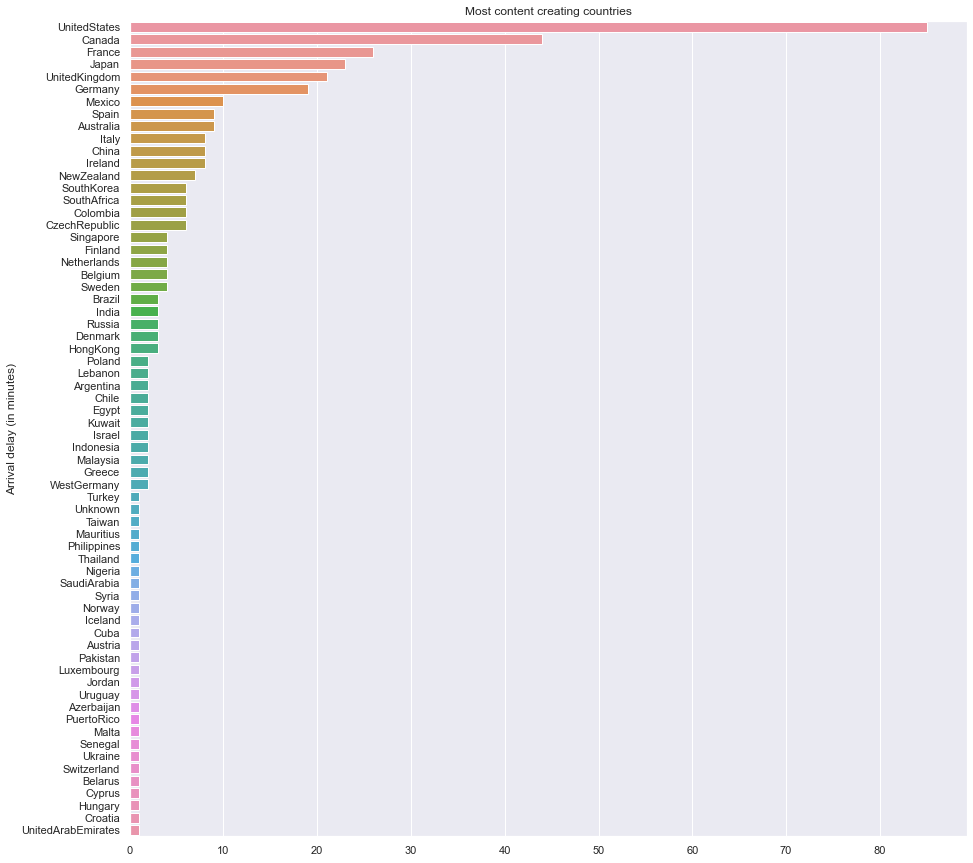

In [83]:
# Set the width and height of the figure
plt.figure(figsize=(15, 15))

# Add title
plt.title('Most content creating countries')

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(y=list(countries_fin1.keys()), x=list(countries_fin1.values()))

# Add label for vertical axis
plt.ylabel('Arrival delay (in minutes)')

In [84]:
features = ['title', 'duration']
durations = netflix_shows[features]

durations['no_of_seasons'] = durations['duration'].str.replace(' Season', '')
durations['no_of_seasons'] = durations['no_of_seasons'].str.replace('s', '')

C:\Users\shaur\AppData\Local\Temp/ipykernel_2204/3595471055.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\shaur\AppData\Local\Temp/ipykernel_2204/3595471055.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
durations['no_of_seasons'] = durations['no_of_seasons'].astype(str).astype(int)

C:\Users\shaur\AppData\Local\Temp/ipykernel_2204/1775206529.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## TV shows with largest number of seasons. 

In [86]:
t = ['title', 'no_of_seasons']
top = durations[t]
top = top.sort_values(by='no_of_seasons', ascending=False) 

<AxesSubplot:xlabel='title'>

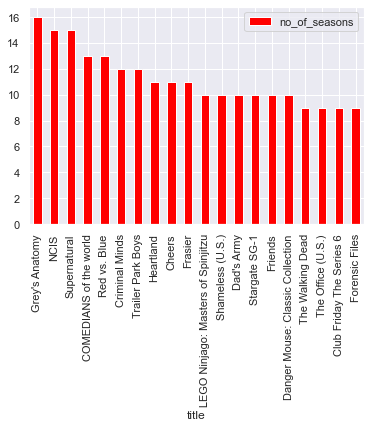

In [87]:
top20 = top[0:20]
top20.plot(kind='bar', x='title', y='no_of_seasons', color='red')

## Lowest number of seasons

In [88]:
bottom = top.sort_values(by = 'no_of_seasons')
bottom = bottom[20:50]

import plotly.graph_objects as go

fig = go.Figure(data = [go.Table(header = dict(values = ['Title', 'No of Seasons']), cells = dict(values = [bottom['title'], bottom['no_of_seasons']], fill_color='lavender'))])
fig.show()

In [89]:
genres = list(netflix_shows['listed_in'])
gen = []

for i in genres:
    i = list(i.split(','))

    for j in i:
        gen.append(j.replace(' ', ''))
g = Counter(gen)

In [90]:
g

Counter({'InternationalTVShows': 1199,
         'TVDramas': 704,
         'TVSci-Fi&Fantasy': 76,
         'TVMysteries': 90,
         'CrimeTVShows': 427,
         'Docuseries': 353,
         'AnimeSeries': 148,
         'RealityTV': 222,
         'TVComedies': 525,
         'RomanticTVShows': 333,
         'Science&NatureTV': 85,
         'BritishTVShows': 232,
         'KoreanTVShows': 150,
         "Kids'TV": 414,
         'TVAction&Adventure': 150,
         'Spanish-LanguageTVShows': 147,
         'TVShows': 12,
         'TVHorror': 69,
         'Stand-UpComedy&TalkShows': 52,
         'TeenTVShows': 60,
         'TVThrillers': 50,
         'Classic&CultTV': 27})

In [91]:
us_series_data = netflix_shows[netflix_shows['country'] == 'United States'] 

In [92]:
oldest_us_series = us_series_data.sort_values(by = 'release_year')[0:20]

In [93]:
fig = go.Figure(data = [go.Table(
    header = dict(values = ['Title', 'Release Year'], fill_color = 'paleturquoise'), 
    cells = dict(values = [oldest_us_series['title'], oldest_us_series['release_year']], fill_color = 'pink'))]
)
fig.show()

In [94]:
newest_us_series = us_series_data.sort_values(by = 'release_year', ascending = False)[0:50]

In [95]:
fig = go.Figure(data = [go.Table(
    header = dict(values = ['Title', 'Release Year'], fill_color = 'yellow'), 
    cells = dict(values = [newest_us_series['title'], newest_us_series['release_year']], fill_color = 'lavender'))]
)
fig.show()

## Content in France

In [96]:
netflix_fr = netflix_overall[netflix_overall['country']=='France']
cleaned_df_fr = netflix_fr.dropna()

fig = px.treemap(cleaned_df_fr, path=['country','director'],
                  color='director', hover_data=['director','title'],color_continuous_scale='Purples')
fig.show()

### It is very interesting to note that the content in France is very rational. There is no director in the data who has a large number of movies. It shows how different directors are given a chance to showcase their talents.

## Recommendation System (Content Based)

<img src="recom.png">

### The TF-IDF(Term Frequency-Inverse Document Frequency (TF-IDF)) score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [98]:
# Removing Stopwords
tfidf = TfidfVectorizer(stop_words='english')

# Replace NaN with an empty string 
netflix_overall['description'] = netflix_overall['description'].fillna('')

# Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_overall['description'])

# Output the shape of tfdif_matrix
tfidf_matrix.shape

(7787, 17905)

### There are about 17905 words described for the 7787 movies in this dataset.

### Here, The Cosine similarity score is used since it is independent of magnitude and is relatively easy and fast to calculate.
<img src="cos_func.png">

In [99]:
# Import linear kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix.
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [100]:
indices = pd.Series(netflix_overall.index, index=netflix_overall['title']).drop_duplicates()

In [101]:
indices[40:55]

title
Çarsi Pazar                    40
Ég man þig                     41
Çok Filim Hareketler Bunlar    42
Òlòtūré                        43
Æon Flux                       44
Şubat                          45
1 Chance 2 Dance               46
1 Mile to You                  47
10 Days in Sun City            48
10 jours en or                 49
10,000 B.C.                    50
100 Days My Prince             51
100 Days Of Solitude           52
100 Humans                     53
100 Meters                     54
dtype: int64

In [102]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwise similarity scores of all movies with that movie.
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity socres.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies.
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies  
    return netflix_overall['title'].iloc[movie_indices]

### Recommendations based on plot.

In [103]:
get_recommendations('Peaky Blinders')

4692                    Our Godfather
4358                   My Stupid Boss
1807                              Don
6344                         The Fear
3219    Jonathan Strange & Mr Norrell
4953                Power Rangers Zeo
6783                       The Prison
6950                       The Tudors
6236                    The Con Is On
6585     The Legend of Michael Mishra
Name: title, dtype: object

In [104]:
get_recommendations('Mortel')

4858                  PILI Fantasy: War of Dragons
1920         Edgar Rice Burroughs' Tarzan and Jane
2159                             Figures of Speech
4314    My Entire High School Sinking Into the Sea
2188                                     FirstBorn
4994                                 Psychokinesis
608                                 At First Light
6958                          The Umbrella Academy
1267                                     Chamatkar
3864                              Maharakshak Devi
Name: title, dtype: object

In [105]:
get_recommendations('Power Rangers Zeo')

4939                               Power Rangers RPM
4941                           Power Rangers Samurai
4930                      Power Rangers Dino Thunder
6067         The Adventures of Sharkboy and Lavagirl
4932                       Power Rangers Jungle Fury
4918                                       Possessed
4931                          Power Rangers in Space
1446                                          Code 8
4949    Power Rangers Super Samurai: Trickster Treat
4088                    Mighty Morphin Power Rangers
Name: title, dtype: object

In [106]:
get_recommendations('Don')

371            Alarmoty in the Land of Fire
5604                               Silencer
4418     Natascha Kampusch: The Whole Story
2077                         Eye For An Eye
6321                 The Eagle of El-Se'eed
391                     Alibaba Aur 40 Chor
6400                        The Good Bandit
3127                 Jarhead: Law of Return
2815                               Hostages
6781    The Princess Switch: Switched Again
Name: title, dtype: object

In [109]:
get_recommendations('Inspector Gadget')

1690                                 Delhi Belly
2942                                        Igor
6783                                  The Prison
1247    Cats & Dogs: The Revenge of Kitty Galore
6186                                    The Bund
5228                          Road To High & Low
4929             Power Rangers Dino Super Charge
5321                                     S Storm
625                  Austin Powers in Goldmember
3964         Marvel's Hulk: Where Monsters Dwell
Name: title, dtype: object